# MA 506 Probability and Statistical Inference
# Lecture 24: Regularized Classification

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Getting the data

In [6]:
bc = load_breast_cancer()
#print(bc.DESCR)

In [7]:
X = bc.data
y = bc.target

In [47]:
#X[:,0]

## Standardizing the data

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


## Dividing data into training and testing set

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
print(len(y_train),len(y_test))

455 114


## Dividing training set further into train and validation sets

In [52]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [53]:
print(len(y_tr),len(y_val))

318 137


## Getting logistic regression functions

In [62]:
def h(X,beta):
    ## returns the value of the sigmoid function
    #print(X.dot(beta))
    ypred = 1/(1 + np.exp(-1*X.dot(beta)))
    return ypred

def model_cost(X,y,beta):
    ## computes the value of the model fitting cost
    cost = 0
    for j in range(X.shape[0]):
        term1 = y[j]*np.log(h(X[j,:],beta))[0]
        term2 = (1 - y[j])*np.log(1 - h(X[j,:],beta))[0]
        cost = cost - (term1+term2)
    return cost

## Avoiding overfitting

1. Early stopping

In [84]:
def gradient_descent_validation(Xtr,ytr,Xval,yval,beta0,alpha,iteration):
    ## Implemented iteration for the gradient descent algorithm
    ypred = h(Xtr,beta0)
    beta = [beta0]
    train_cost = [model_cost(Xtr,ytr,beta0)]
    #print(model_cost(Xtr,ytr,beta0))
    #return
    val_cost = [model_cost(Xval,yval,beta0)]
    for j in range(iteration):
        grad_l = -1*Xtr.T.dot(ytr.reshape(-1,1) - ypred)
        beta_new = beta[-1] - alpha * grad_l
        ypred = h(Xtr,beta_new)
        beta.append(beta_new)
        print(f'At Iter {j}: Train cost:{model_cost(Xtr,ytr,beta_new)};Val cost: {model_cost(Xval,yval,beta_new)}')
        train_cost.append(model_cost(Xtr,ytr,beta_new))
        val_cost.append(model_cost(Xval,yval,beta_new))
    return [beta,np.array(train_cost),np.array(val_cost)]

In [88]:
%%time
beta = 0.1*np.ones([X.shape[1]+1,1])
alpha = 0.001
iteration = 500
XX_tr = np.concatenate((np.ones([len(X_tr),1]),X_tr),axis = 1)
XX_val = np.concatenate((np.ones([len(X_val),1]),X_val),axis = 1)
beta,train_cost,val_cost = gradient_descent_validation(XX_tr,y_tr,XX_val,y_val,
                                                  beta,alpha,iteration)

At Iter 0: Train cost:129.06892653573428;Val cost: 55.419600182154205
At Iter 1: Train cost:89.89967638977046;Val cost: 37.49105914416196
At Iter 2: Train cost:75.96044523991692;Val cost: 31.428368802032306
At Iter 3: Train cost:67.73027447845591;Val cost: 28.00200609501544
At Iter 4: Train cost:62.03506424728679;Val cost: 25.710219067411185
At Iter 5: Train cost:57.76696772002614;Val cost: 24.03764588609951
At Iter 6: Train cost:54.4095157517202;Val cost: 22.749845837302935
At Iter 7: Train cost:51.679214366036824;Val cost: 21.721638663588227
At Iter 8: Train cost:49.403501016448914;Val cost: 20.878808242615
At Iter 9: Train cost:47.469752246164624;Val cost: 20.17398483817893
At Iter 10: Train cost:45.800710938702736;Val cost: 19.57523295892134
At Iter 11: Train cost:44.34134931261389;Val cost: 19.060093992744584
At Iter 12: Train cost:43.05128726505472;Val cost: 18.61223412865172
At Iter 13: Train cost:41.90015845651864;Val cost: 18.219443531750173
At Iter 14: Train cost:40.864649707

At Iter 120: Train cost:21.248522724973636;Val cost: 14.443911995172833
At Iter 121: Train cost:21.20321454351412;Val cost: 14.44911629553258
At Iter 122: Train cost:21.158448165622584;Val cost: 14.454342710434508
At Iter 123: Train cost:21.11421257152749;Val cost: 14.45958963353404
At Iter 124: Train cost:21.070497048637208;Val cost: 14.464855532612482
At Iter 125: Train cost:21.027291180676272;Val cost: 14.47013894606296
At Iter 126: Train cost:20.984584837286402;Val cost: 14.475438479555498
At Iter 127: Train cost:20.94236816406888;Val cost: 14.48075280287129
At Iter 128: Train cost:20.900631573046397;Val cost: 14.486080646897006
At Iter 129: Train cost:20.8593657335238;Val cost: 14.491420800770115
At Iter 130: Train cost:20.818561563327833;Val cost: 14.496772109167255
At Iter 131: Train cost:20.778210220408106;Val cost: 14.502133469727797
At Iter 132: Train cost:20.738303094780814;Val cost: 14.507503830605225
At Iter 133: Train cost:20.69883180080018;Val cost: 14.512882188139711
At

At Iter 238: Train cost:18.006208763656424;Val cost: 15.04440472789611
At Iter 239: Train cost:17.988926367222813;Val cost: 15.048928198044187
At Iter 240: Train cost:17.97174044600866;Val cost: 15.053441335982484
At Iter 241: Train cost:17.954649969925086;Val cost: 15.057944176758282
At Iter 242: Train cost:17.9376539239652;Val cost: 15.062436755744882
At Iter 243: Train cost:17.920751307924917;Val cost: 15.066919108622105
At Iter 244: Train cost:17.90394113613017;Val cost: 15.071391271357282
At Iter 245: Train cost:17.887222437170127;Val cost: 15.075853280187097
At Iter 246: Train cost:17.87059425363633;Val cost: 15.080305171600227
At Iter 247: Train cost:17.854055641867838;Val cost: 15.084746982320423
At Iter 248: Train cost:17.837605671701564;Val cost: 15.089178749290598
At Iter 249: Train cost:17.821243426228556;Val cost: 15.09360050965724
At Iter 250: Train cost:17.804968001555306;Val cost: 15.09801230075562
At Iter 251: Train cost:17.788778506570445;Val cost: 15.102414160095526


At Iter 357: Train cost:16.428919483226352;Val cost: 15.520372711680393
At Iter 358: Train cost:16.418558414160906;Val cost: 15.523925141900824
At Iter 359: Train cost:16.408231398222664;Val cost: 15.527471433061992
At Iter 360: Train cost:16.397938192306224;Val cost: 15.531011613958134
At Iter 361: Train cost:16.387678555748995;Val cost: 15.534545713259693
At Iter 362: Train cost:16.3774522503005;Val cost: 15.538073759513958
At Iter 363: Train cost:16.36725904009215;Val cost: 15.541595781145352
At Iter 364: Train cost:16.35709869160724;Val cost: 15.545111806455997
At Iter 365: Train cost:16.346970973651796;Val cost: 15.548621863626092
At Iter 366: Train cost:16.33687565732539;Val cost: 15.552125980714479
At Iter 367: Train cost:16.326812515992767;Val cost: 15.55562418565901
At Iter 368: Train cost:16.316781325255743;Val cost: 15.55911650627712
At Iter 369: Train cost:16.30678186292547;Val cost: 15.562602970266243
At Iter 370: Train cost:16.296813908995297;Val cost: 15.56608360520431
A

At Iter 474: Train cost:15.398614830352656;Val cost: 15.901002339485165
At Iter 475: Train cost:15.391054280256144;Val cost: 15.904003339780862
At Iter 476: Train cost:15.383510371657378;Val cost: 15.90700085698374
At Iter 477: Train cost:15.375983018130603;Val cost: 15.909994908658367
At Iter 478: Train cost:15.368472133918832;Val cost: 15.912985512298413
At Iter 479: Train cost:15.360977633927233;Val cost: 15.915972685327018
At Iter 480: Train cost:15.353499433716998;Val cost: 15.918956445097203
At Iter 481: Train cost:15.346037449498773;Val cost: 15.921936808892108
At Iter 482: Train cost:15.338591598126522;Val cost: 15.92491379392536
At Iter 483: Train cost:15.331161797091328;Val cost: 15.927887417341493
At Iter 484: Train cost:15.323747964515292;Val cost: 15.93085769621616
At Iter 485: Train cost:15.316350019145483;Val cost: 15.93382464755656
At Iter 486: Train cost:15.308967880347959;Val cost: 15.936788288301674
At Iter 487: Train cost:15.301601468101916;Val cost: 15.939748635322

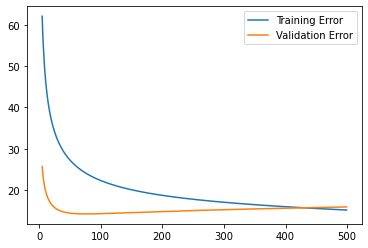

In [89]:
index = list(range(5,500))
plt.plot(index,train_cost[index],label = 'Training Error')
plt.plot(index,val_cost[index],label = 'Validation Error')
plt.legend();

2. Stochastic Gradient Descent